In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

In [36]:
# Load the dataset
file_path = 'YerliEnerjiKaynakları.csv'
data = pd.read_csv(file_path)

# Correct the columns to convert
columns_to_convert = ['Baraj', 'Göl ve Akarsu', 'Hidrolik Toplam', 'Jeotermal', 'Rüzgar', 'Güneş', 'Linyit', 'Türkiye Toplam Kurulu Gücü']

# Convert numerical values from string format to float
for column in columns_to_convert:
    data[column] = data[column].str.replace('.', '').str.replace(',', '.').astype(float)

# Display the cleaned data types to verify conversion
print(data.dtypes)
print(data)


Yıllar                          int64
Baraj                         float64
Göl ve Akarsu                 float64
Hidrolik Toplam               float64
Jeotermal                     float64
Rüzgar                        float64
Güneş                         float64
Linyit                        float64
Türkiye Toplam Kurulu Gücü    float64
dtype: object
    Yıllar    Baraj  Göl ve Akarsu  Hidrolik Toplam  Jeotermal   Rüzgar  \
0     2000  10501.4          673.8          11175.2       17.5     18.9   
1     2001  10959.4          713.5          11672.9       17.5     18.9   
2     2002  11469.4          771.5          12240.9       17.5     18.9   
3     2003  11752.4          826.3          12578.7       15.0     18.9   
4     2004  11752.4          893.0          12645.4       15.0     18.9   
5     2005  11967.4          938.6          12906.1       15.0     20.1   
6     2006  11966.9         1095.8          13062.7       23.0     59.0   
7     2007  12262.0         1132.9          

In [37]:
for column in columns_to_convert[:-1]:  # Exclude the 'Türkiye Toplam Kurulu Gücü'
    data[column + ' Pay'] = data[column] / data['Türkiye Toplam Kurulu Gücü'] * 100

print(data.head())

   Yıllar    Baraj  Göl ve Akarsu  Hidrolik Toplam  Jeotermal  Rüzgar  Güneş  \
0    2000  10501.4          673.8          11175.2       17.5    18.9    0.0   
1    2001  10959.4          713.5          11672.9       17.5    18.9    0.0   
2    2002  11469.4          771.5          12240.9       17.5    18.9    0.0   
3    2003  11752.4          826.3          12578.7       15.0    18.9    0.0   
4    2004  11752.4          893.0          12645.4       15.0    18.9    0.0   

   Linyit  Türkiye Toplam Kurulu Gücü  Baraj Pay  Göl ve Akarsu Pay  \
0  6508.9                     27264.1  38.517318           2.471382   
1  6510.7                     28332.4  38.681510           2.518318   
2  6502.9                     31845.8  36.015424           2.422611   
3  6438.9                     35587.0  33.024419           2.321915   
4  6450.8                     36824.0  31.915055           2.425049   

   Hidrolik Toplam Pay  Jeotermal Pay  Rüzgar Pay  Güneş Pay  Linyit Pay  
0            40.9

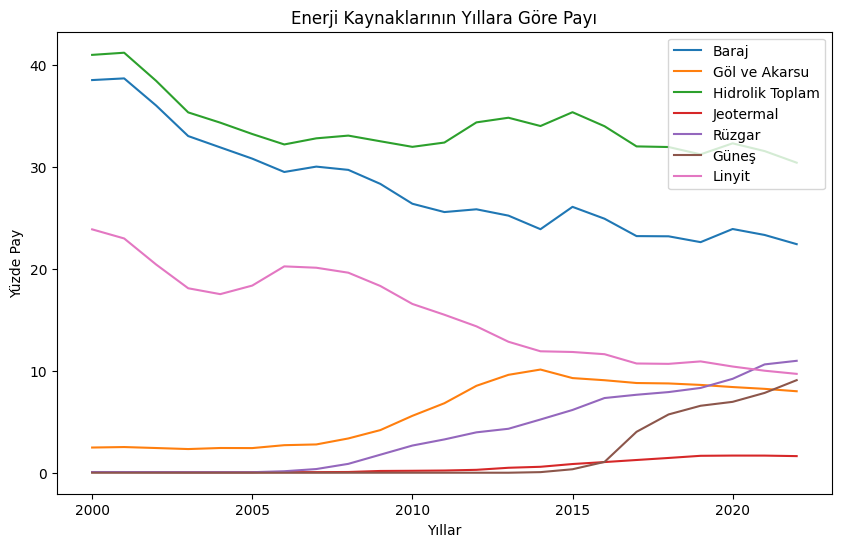

In [38]:
plt.figure(figsize=(10, 6))
for column in columns_to_convert[:-1]:
    plt.plot(data['Yıllar'], data[column + ' Pay'], label=column)
plt.xlabel('Yıllar')
plt.ylabel('Yüzde Pay')
plt.title('Enerji Kaynaklarının Yıllara Göre Payı')
plt.legend()
plt.show()


In [39]:
# Veri hazırlama
X = data[['Yıllar']]
y_columns = columns_to_convert[:-1]  # 'Türkiye Toplam Kurulu Gücü' hariç

years = np.arange(2022, 2031).reshape(-1, 1)

Baraj Linear Regression MSE: 1771277.3036030126
Göl ve Akarsu Linear Regression MSE: 1423686.406079899
Hidrolik Toplam Linear Regression MSE: 6312645.362185279
Jeotermal Linear Regression MSE: 80561.2835471359
Rüzgar Linear Regression MSE: 2354619.2160366867
Güneş Linear Regression MSE: 3573327.4298896245
Linyit Linear Regression MSE: 106252.42088603934


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

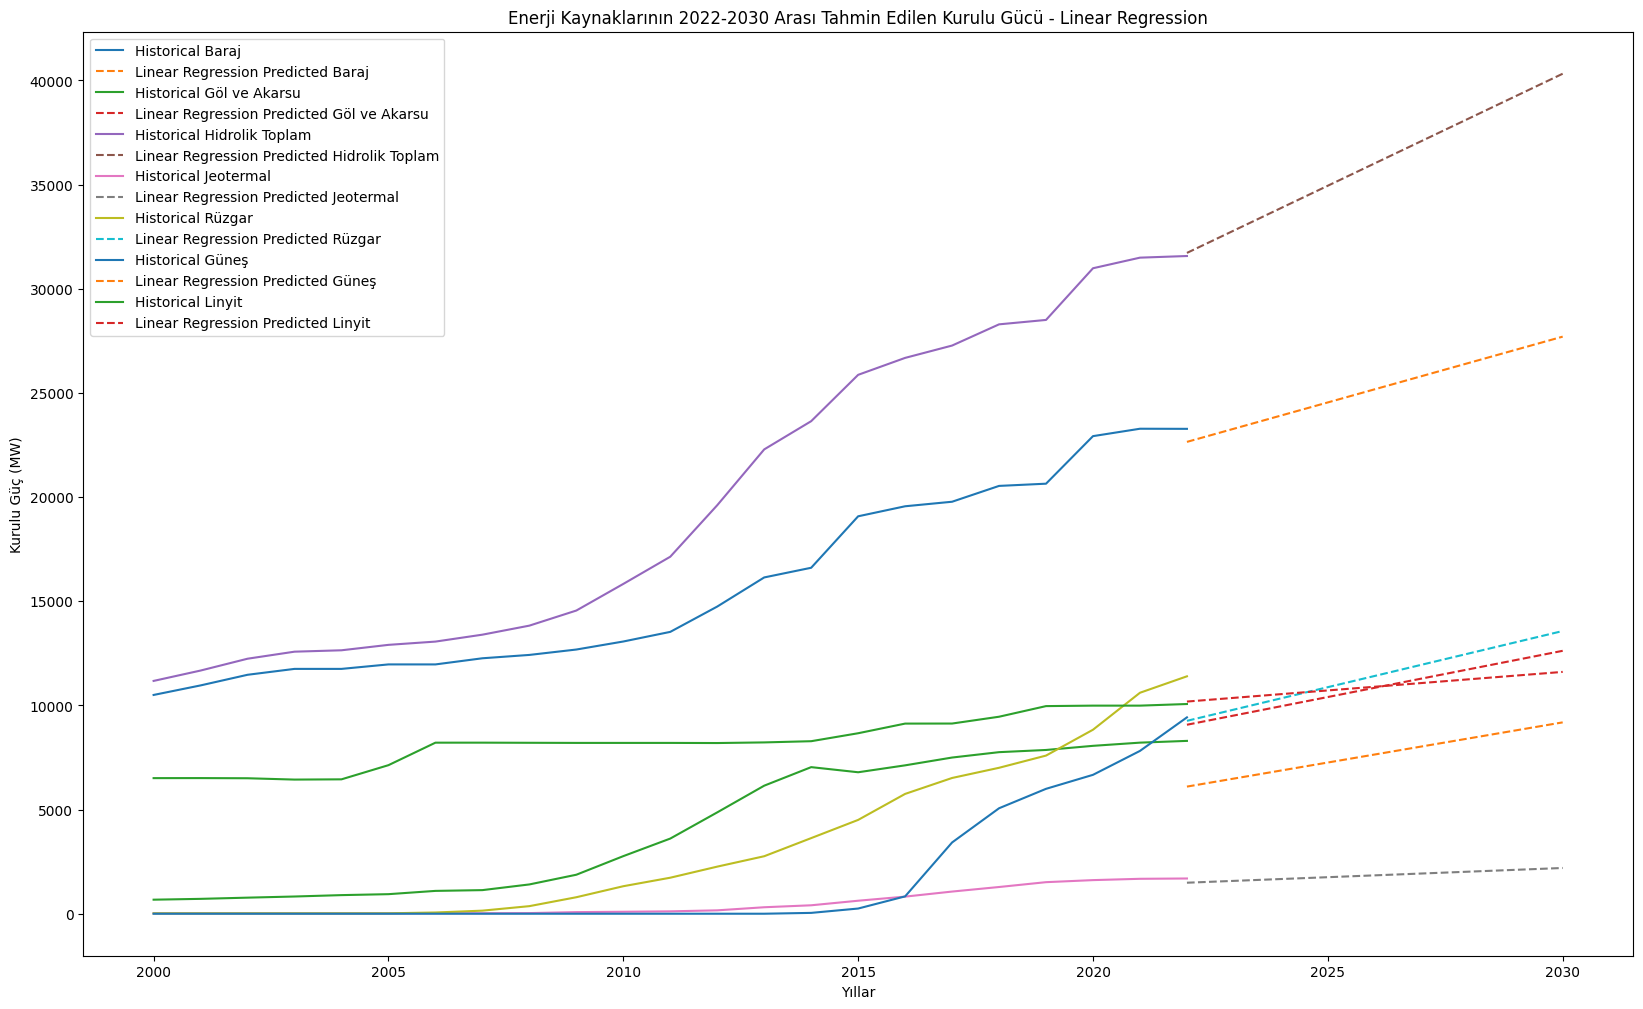

In [40]:
# Linear Regression modeli
model = LinearRegression()

# Her enerji kaynağı için tahminler
predictions = {}
for column in y_columns:
    y = data[column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{column} Linear Regression MSE: {mse}")

    future_predictions = model.predict(years)
    predictions[column] = future_predictions

# Tahminleri görselleştirme
plt.figure(figsize=(20, 12))
for column in y_columns:
    plt.plot(data['Yıllar'], data[column], label=f"Historical {column}")
    plt.plot(years, predictions[column], '--', label=f"Linear Regression Predicted {column}")

plt.xlabel('Yıllar')
plt.ylabel('Kurulu Güç (MW)')
plt.title('Enerji Kaynaklarının 2022-2030 Arası Tahmin Edilen Kurulu Gücü - Linear Regression')
plt.legend()
plt.show()

Baraj Polynomial Regression MSE: 932626.7046556236
Göl ve Akarsu Polynomial Regression MSE: 1421088.3023414456
Hidrolik Toplam Polynomial Regression MSE: 3443021.109975441
Jeotermal Polynomial Regression MSE: 6218.980685842267
Rüzgar Polynomial Regression MSE: 81966.53571330706
Güneş Polynomial Regression MSE: 1298245.6728829795
Linyit Polynomial Regression MSE: 106970.76127807314


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid

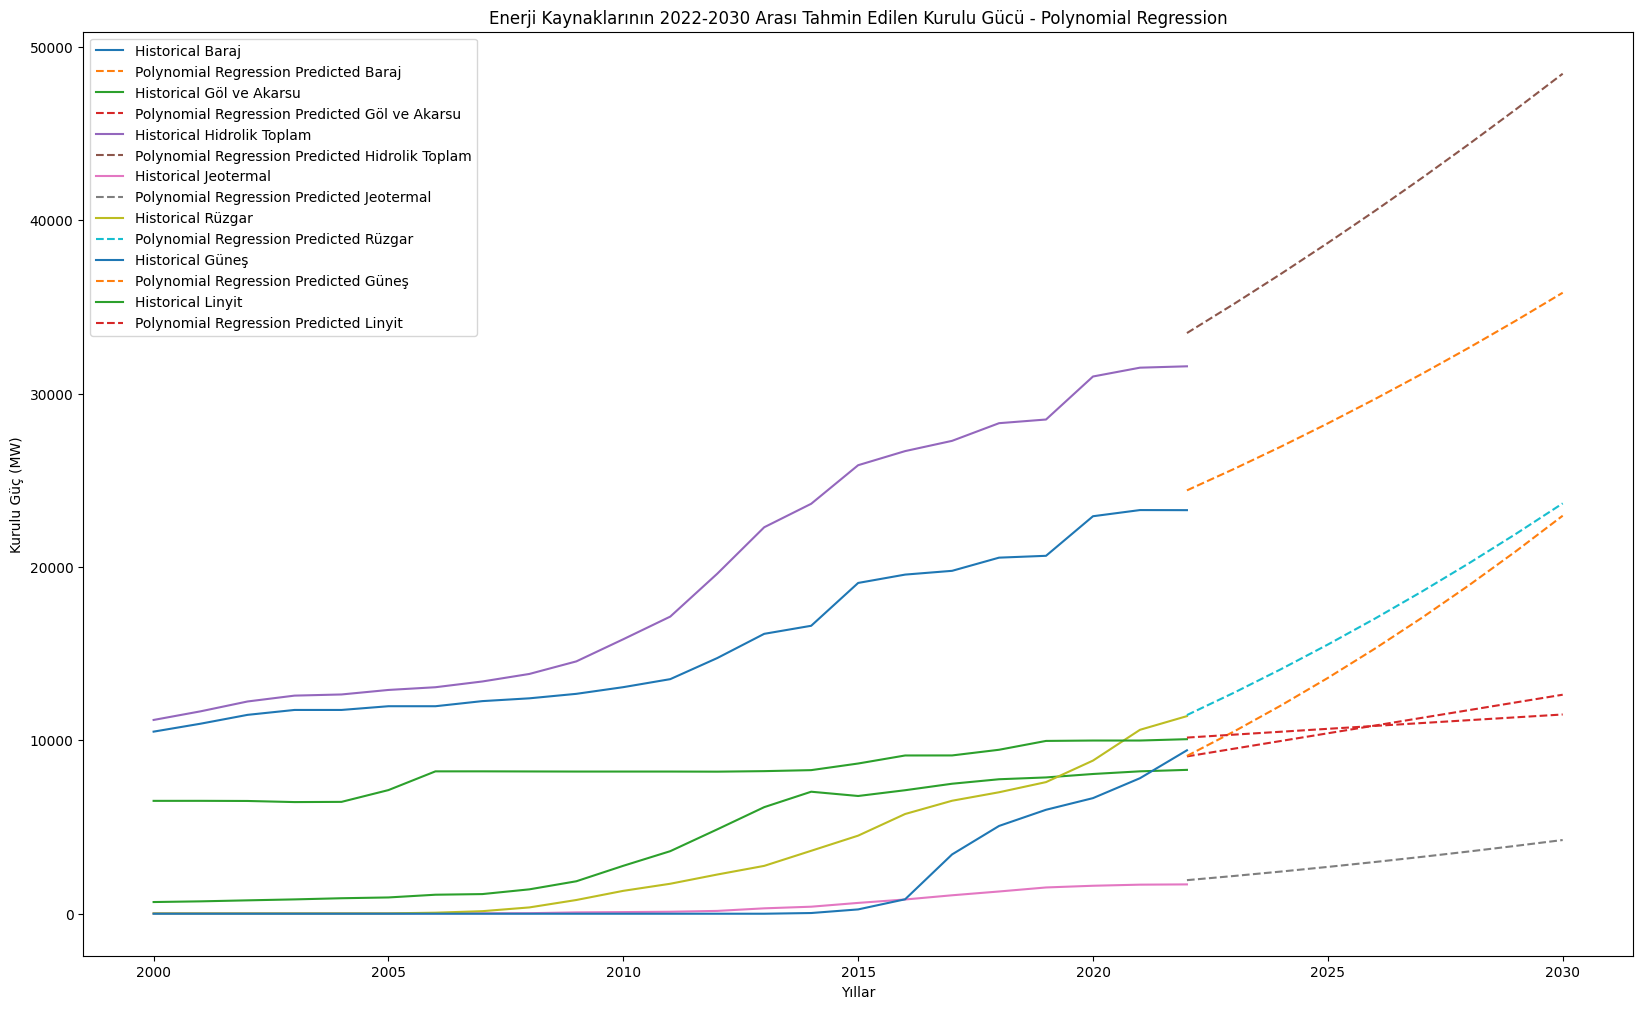

In [41]:
# Polynomial Regression modeli
model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

# Her enerji kaynağı için tahminler
predictions = {}
for column in y_columns:
    y = data[column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{column} Polynomial Regression MSE: {mse}")

    future_predictions = model.predict(years)
    predictions[column] = future_predictions

# Tahminleri görselleştirme
plt.figure(figsize=(20, 12))
for column in y_columns:
    plt.plot(data['Yıllar'], data[column], label=f"Historical {column}")
    plt.plot(years, predictions[column], '--', label=f"Polynomial Regression Predicted {column}")

plt.xlabel('Yıllar')
plt.ylabel('Kurulu Güç (MW)')
plt.title('Enerji Kaynaklarının 2022-2030 Arası Tahmin Edilen Kurulu Gücü - Polynomial Regression')
plt.legend()
plt.show()

Baraj Polynomial Regression MSE: 965600.7775579098
Göl ve Akarsu Polynomial Regression MSE: 386277.1787345789
Hidrolik Toplam Polynomial Regression MSE: 2063642.816600041
Jeotermal Polynomial Regression MSE: 11117.0662819108
Rüzgar Polynomial Regression MSE: 81892.8039072672
Güneş Polynomial Regression MSE: 327522.0952004044
Linyit Polynomial Regression MSE: 119354.70393161057


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid

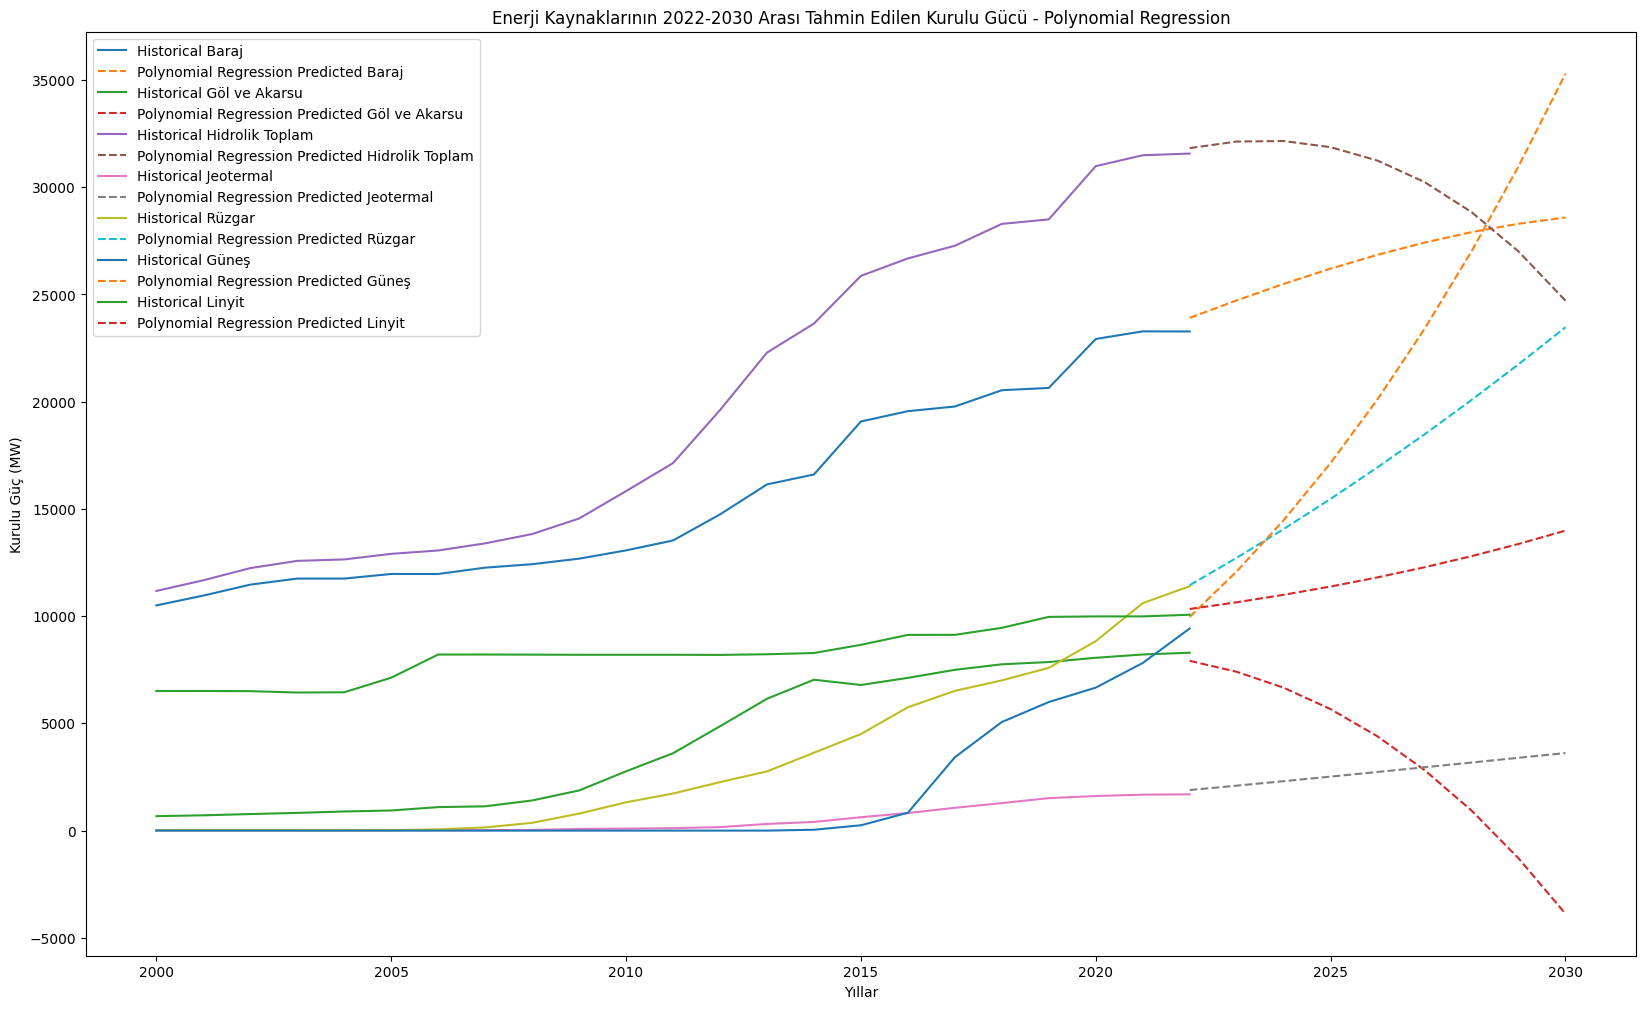

In [42]:
# Polynomial Regression modeli
model = make_pipeline(PolynomialFeatures(degree=6), LinearRegression())

# Her enerji kaynağı için tahminler
predictions = {}
for column in y_columns:
    y = data[column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{column} Polynomial Regression MSE: {mse}")

    future_predictions = model.predict(years)
    predictions[column] = future_predictions

# Tahminleri görselleştirme
plt.figure(figsize=(20, 12))
for column in y_columns:
    plt.plot(data['Yıllar'], data[column], label=f"Historical {column}")
    plt.plot(years, predictions[column], '--', label=f"Polynomial Regression Predicted {column}")

plt.xlabel('Yıllar')
plt.ylabel('Kurulu Güç (MW)')
plt.title('Enerji Kaynaklarının 2022-2030 Arası Tahmin Edilen Kurulu Gücü - Polynomial Regression')
plt.legend()
plt.show()

Baraj Decision Tree MSE: 1306759.7299999993
Göl ve Akarsu Decision Tree MSE: 214670.99799999996
Hidrolik Toplam Decision Tree MSE: 1473645.0599999996
Jeotermal Decision Tree MSE: 21449.616000000005
Rüzgar Decision Tree MSE: 334846.93199999986
Güneş Decision Tree MSE: 1348458.64
Linyit Decision Tree MSE: 29210.274000000052


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does

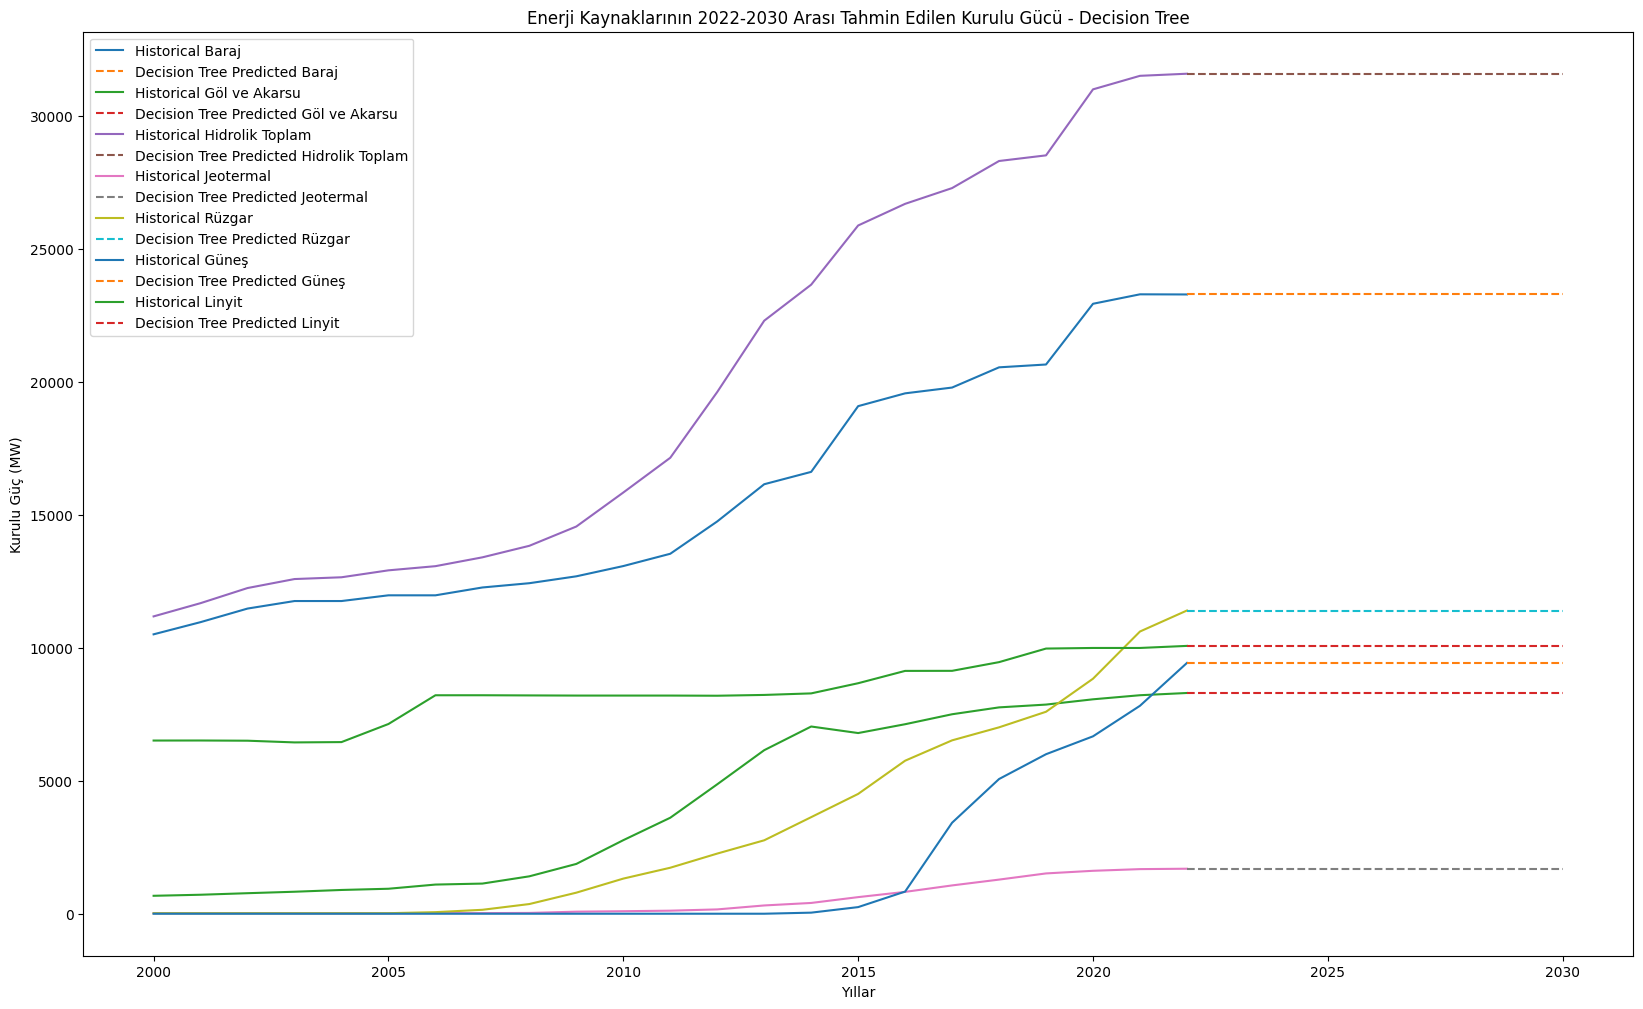

In [43]:
# Decision Tree modeli
model = DecisionTreeRegressor()

# Her enerji kaynağı için tahminler
predictions = {}
for column in y_columns:
    y = data[column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{column} Decision Tree MSE: {mse}")

    future_predictions = model.predict(years)
    predictions[column] = future_predictions

# Tahminleri görselleştirme
plt.figure(figsize=(20, 12))
for column in y_columns:
    plt.plot(data['Yıllar'], data[column], label=f"Historical {column}")
    plt.plot(years, predictions[column], '--', label=f"Decision Tree Predicted {column}")

plt.xlabel('Yıllar')
plt.ylabel('Kurulu Güç (MW)')
plt.title('Enerji Kaynaklarının 2022-2030 Arası Tahmin Edilen Kurulu Gücü - Decision Tree')
plt.legend()
plt.show()


Baraj Random Forest MSE: 655761.5775150082
Göl ve Akarsu Random Forest MSE: 58519.41603740015


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Hidrolik Toplam Random Forest MSE: 860950.4673313892
Jeotermal Random Forest MSE: 5315.616688199982


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Rüzgar Random Forest MSE: 59619.353182999395
Güneş Random Forest MSE: 152551.96809700018


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Linyit Random Forest MSE: 11412.618285399216


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


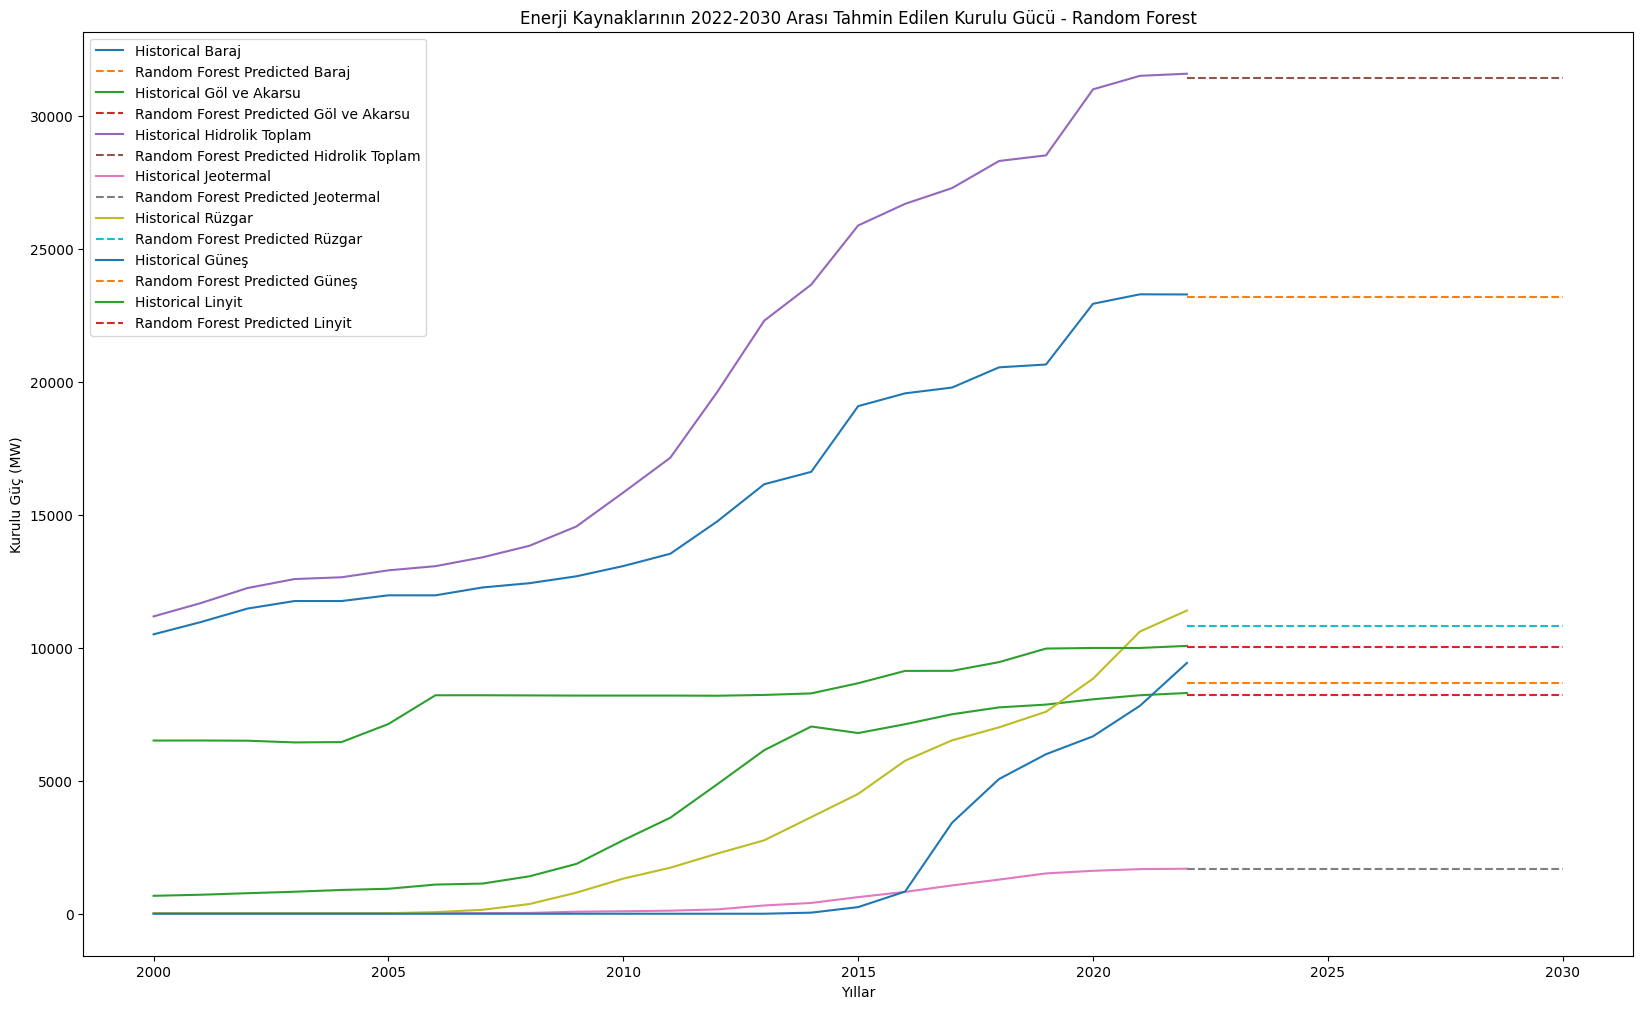

In [44]:
# Random Forest modeli
model = RandomForestRegressor()

# Her enerji kaynağı için tahminler
predictions = {}
for column in y_columns:
    y = data[column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{column} Random Forest MSE: {mse}")

    future_predictions = model.predict(years)
    predictions[column] = future_predictions

# Tahminleri görselleştirme
plt.figure(figsize=(20, 12))
for column in y_columns:
    plt.plot(data['Yıllar'], data[column], label=f"Historical {column}")
    plt.plot(years, predictions[column], '--', label=f"Random Forest Predicted {column}")

plt.xlabel('Yıllar')
plt.ylabel('Kurulu Güç (MW)')
plt.title('Enerji Kaynaklarının 2022-2030 Arası Tahmin Edilen Kurulu Gücü - Random Forest')
plt.legend()
plt.show()


Baraj Gradient Boosting MSE: 1306861.0977860983
Göl ve Akarsu Gradient Boosting MSE: 214686.01950288503
Hidrolik Toplam Gradient Boosting MSE: 1473879.3620303958
Jeotermal Gradient Boosting MSE: 21450.633561330877
Rüzgar Gradient Boosting MSE: 334875.0384583747


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


Güneş Gradient Boosting MSE: 1348422.8190780967
Linyit Gradient Boosting MSE: 29211.002482693515


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


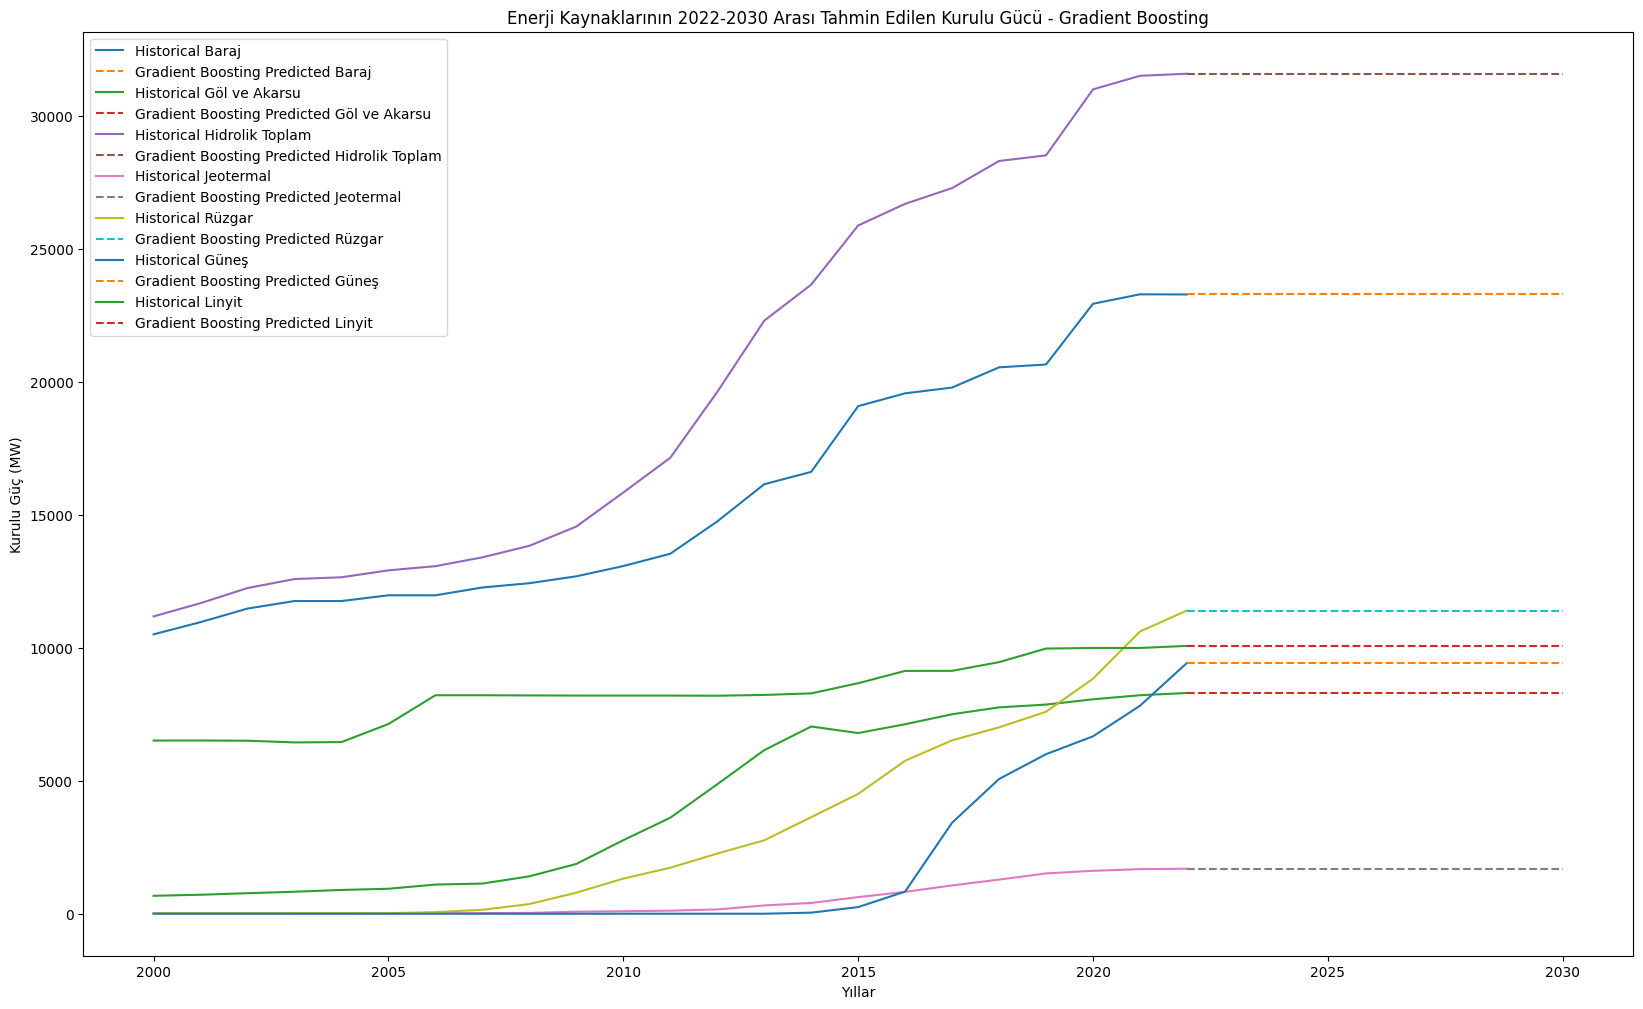

In [45]:
# Gradient Boosting modeli
model = GradientBoostingRegressor()

# Her enerji kaynağı için tahminler
predictions = {}
for column in y_columns:
    y = data[column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{column} Gradient Boosting MSE: {mse}")

    future_predictions = model.predict(years)
    predictions[column] = future_predictions

# Tahminleri görselleştirme
plt.figure(figsize=(20, 12))
for column in y_columns:
    plt.plot(data['Yıllar'], data[column], label=f"Historical {column}")
    plt.plot(years, predictions[column], '--', label=f"Gradient Boosting Predicted {column}")

plt.xlabel('Yıllar')
plt.ylabel('Kurulu Güç (MW)')
plt.title('Enerji Kaynaklarının 2022-2030 Arası Tahmin Edilen Kurulu Gücü - Gradient Boosting')
plt.legend()
plt.show()


Baraj SVR MSE: 14861636.950452903
Göl ve Akarsu SVR MSE: 8662461.821531955
Hidrolik Toplam SVR MSE: 44424750.365572825
Jeotermal SVR MSE: 221056.69093326706
Rüzgar SVR MSE: 6926296.676565072
Güneş SVR MSE: 2341922.28463287
Linyit SVR MSE: 784345.8017487079


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/usr

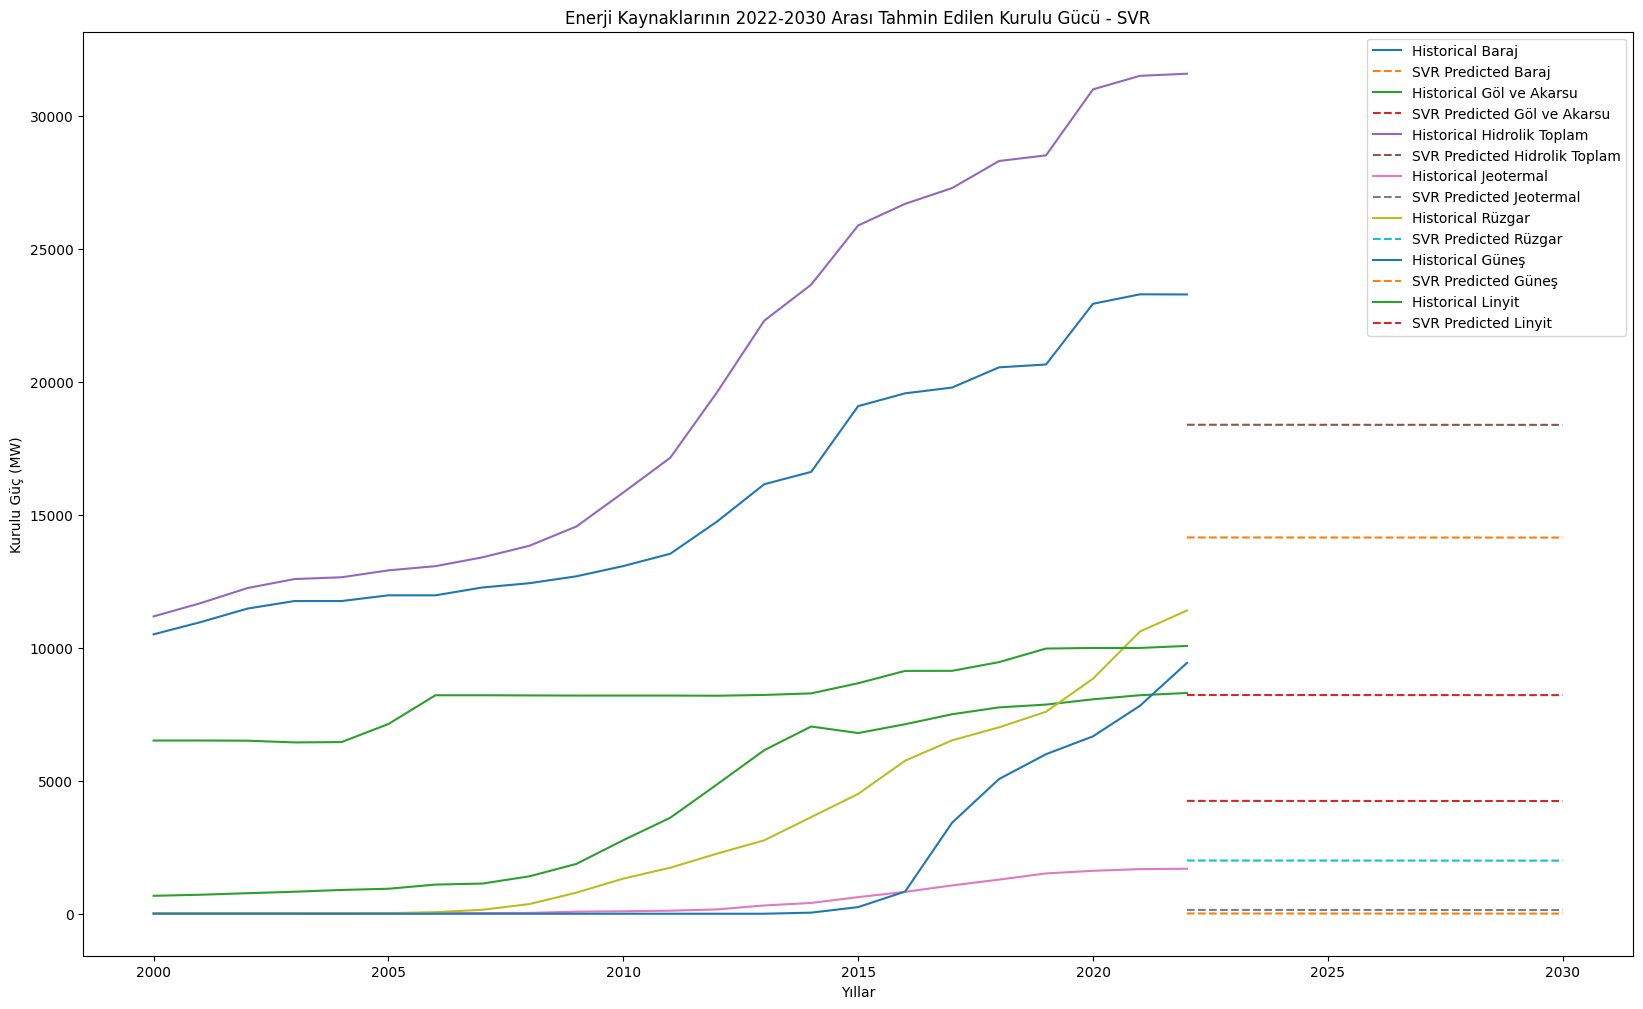

In [46]:
# SVR modeli
model = SVR()

# Her enerji kaynağı için tahminler
predictions = {}
for column in y_columns:
    y = data[column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{column} SVR MSE: {mse}")

    future_predictions = model.predict(years)
    predictions[column] = future_predictions

# Tahminleri görselleştirme
plt.figure(figsize=(20, 12))
for column in y_columns:
    plt.plot(data['Yıllar'], data[column], label=f"Historical {column}")
    plt.plot(years, predictions[column], '--', label=f"SVR Predicted {column}")

plt.xlabel('Yıllar')
plt.ylabel('Kurulu Güç (MW)')
plt.title('Enerji Kaynaklarının 2022-2030 Arası Tahmin Edilen Kurulu Gücü - SVR')
plt.legend()
plt.show()
